In [35]:
import handcalcs.render
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [36]:
L_O=-45       #Longitude Hora Legal
L =-46.6388  #Longitude 
L_a= -23.5489  #Latitude
Beta=0           #Inclinação 
GSC=1.367         #Constante solar  KW/m^2

In [37]:
df=pd.read_csv("Dados Segundo exercicio.csv" , encoding ='UTF-8' , sep=";")



NUMERO DO DIA NO ANO

In [38]:
df['n']= df['Dia']  + (df['Mês'] -1)*30 +df['Cor']


CALCULO DA HORA SOLAR 

In [39]:
df['B']= (360/364)*(df['n']-81)

In [40]:
df['E']= 9.87*np.sin(np.radians(2*df['B']))-7.53*np.cos(np.radians(df['B']))-1.5*np.sin(np.radians(df['B']))

In [41]:
df['Corhora']= (4*(L_O-L)+df['E'])/60

In [42]:
HL=14.50


In [43]:
df['HS']= HL+df['Corhora']


ÂNGULO HORARIO

In [44]:
df['Omega']= (df['HS']-12)*15

DECLINAÇÃO SOLAR 

In [45]:
df['sigma']= 23.45*np.sin(np.radians(360/365*(284+df['n'])))

ÂNGULO ZENITAL 

In [46]:
df['teta_z']= np.degrees(np.arccos(np.sin(np.radians(df['sigma']))*(np.sin(np.radians(L_a))+np.cos(np.radians(df['sigma']))*np.cos(np.radians(L_a))*np.cos(np.radians(df['Omega'])))))



ÂNGULO DE INCIDENCIA 

In [47]:
df['teta']=np.degrees(np.arccos(np.cos(np.radians(L_a+Beta)*np.cos(np.radians(df['sigma']))*np.cos(np.radians(df['Omega']))+np.sin(np.radians(L_a+Beta))*np.sin(np.radians(df['sigma'])))))


IRRADIAÇÃO EXTRATERRESTE SOBRE UMA SUPERFICIE HORIZONTAL EM UM PONTO DA TERRA

In [48]:
df['GO']=GSC*(1+0.033*np.cos(np.radians((360*df['n'])/365)))*np.cos(np.radians(df['teta_z']))


ÂNGULO HORÁRIO DO PÔR DO SOL 

In [49]:
df['omega_s']=np.degrees(np.arccos((-np.tan(np.radians(L_a))*np.tan(np.radians(df['sigma'])))))


IRRADIAÇÃO EXTRATERRESTRE INTEGRADA HORARI SOBRE SUPERFICIE HORIZONTAL 

In [50]:
df['HO']=((2.75*10**4)*GSC*((1+0.033*np.cos(np.radians((360*df['n'])/365))))*(((1.75*10**-2)*df['omega_s']*np.sin(np.radians(df['sigma']))*np.sin(np.radians(L_a))+np.cos(np.radians(df['sigma']))*np.cos(np.radians(L_a))*np.sin(np.radians(df['omega_s'])))))/1000


In [51]:
df['H']=pd.read_csv("Irradiação integrada diaria.csv" , encoding ='UTF-8' , sep=";")


In [52]:
df['KT']=df['H']/df['HO']


In [53]:
df['Hd/H']=0.775+0.0065*(df['omega_s']-90)-(0.505+0.00455*(df['omega_s']-90))*np.cos(np.radians(115*df['KT']-103))


In [54]:
df['Hd']=df['Hd/H']*df['H']


In [55]:
df['Hb']=df['H']-df['Hd']


Text(0, 0.5, 'Irradiação Solar ')

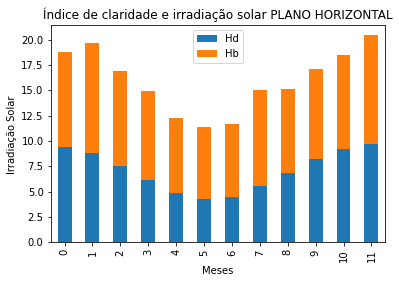

In [56]:
df[["Hd", "Hb", ]].plot(kind="bar", stacked=True)
plt.title("Índice de claridade e irradiação solar PLANO HORIZONTAL")
plt.xlabel("Meses")
plt.ylabel("Irradiação Solar ")

Superficie no hemisferio Sul  

In [57]:
Beta_incli=30

In [58]:
df['omega_s*']=np.degrees(np.arccos((-np.tan(np.radians(L_a+Beta_incli))*np.tan(np.radians(df['sigma'])))))


In [59]:
df['Rb']=(np.cos(np.radians(L_a+Beta_incli))*np.cos(np.radians(df['sigma']))*np.sin(np.radians(df['omega_s*']))+(np.pi/180)*df['omega_s*']*np.sin(np.radians(L_a+Beta_incli))*np.sin(np.radians(df['sigma'])))/(np.cos(np.radians(L_a))*np.cos(np.radians(df['sigma']))*np.sin(np.radians(df['omega_s']))+(np.pi/180)*df['omega_s']*np.sin(np.radians(L_a))*np.sin(np.radians(df['sigma'])))


In [60]:
rho=0.2

In [61]:
df['R']=(1-df['Hd/H'])*df['Rb']+df['Hd/H']*((1+np.cos(np.radians(Beta_incli)))/2)+rho*(((1-np.cos(np.radians(Beta_incli)))/2))


In [62]:
df['HT']=df['R']*df['H']


In [63]:
df['HTb']=(1-df['Hd/H'])*df['Rb']*df['H']


In [64]:
df['HTd']=df['Hd/H']*((1+np.cos(np.radians(Beta_incli)))/2)*df['H']


In [65]:
df['HTr']=rho*(((1-np.cos(np.radians(Beta_incli)))/2))*df['H']
df


,Dia,Cor,Mês,n,B,E,Corhora,HS,Omega,sigma,...,Hd/H,Hd,Hb,omega_s*,Rb,R,HT,HTb,HTd,HTr
0,15,0,1,15,-65.274725,-9.286743,-0.045526,14.454474,36.817114,-21.269474,...,0.501132,9.417272,9.374728,87.477299,0.788533,0.874334,16.430482,7.392282,8.786435,0.251765
1,15,1,2,46,-34.615385,-14.573582,-0.133640,14.366360,35.495405,-13.289156,...,0.446415,8.806876,10.921124,88.469660,0.890194,0.922706,18.203151,9.721919,8.216927,0.264305
2,15,-1,3,74,-6.923077,-9.656338,-0.051686,14.448314,36.724715,-2.818879,...,0.447020,7.563581,9.356419,89.681007,1.039207,1.005134,17.006860,9.723258,7.056917,0.226685
3,15,0,4,105,23.736264,-0.223084,0.105535,14.605535,39.083029,9.414893,...,0.409361,6.101122,8.802878,91.074302,1.255268,1.136746,16.942068,11.049968,5.692424,0.199676
4,15,0,5,135,53.406593,3.754880,0.171835,14.671835,40.077520,18.791918,...,0.395092,4.864378,7.447622,92.204986,1.478340,1.276283,15.713597,11.010121,4.538527,0.164950
5,15,1,6,166,84.065934,-0.240580,0.105244,14.605244,39.078655,23.314410,...,0.375049,4.280057,7.131943,92.793121,1.616536,1.373579,15.675282,11.529042,3.993348,0.152892
6,15,1,7,196,113.736264,-5.615811,0.015656,14.515656,37.734847,21.517336,...,0.384968,4.490268,7.173732,92.555060,1.558511,1.331111,15.526083,11.180338,4.189477,0.156268
7,15,2,8,227,144.395604,-4.094882,0.041005,14.541005,38.115080,13.783564,...,0.367588,5.543221,9.536779,91.589506,1.350701,1.210561,18.255265,12.881336,5.171896,0.202034
8,15,3,9,258,175.054945,5.677410,0.203877,14.703877,40.558152,2.216887,...,0.451463,6.826123,8.293877,90.250792,1.120950,1.049501,15.868448,9.297019,6.368859,0.202570
9,15,3,10,288,204.725275,14.966751,0.358699,14.858699,42.880488,-9.599397,...,0.476679,8.168366,8.967634,88.904247,0.940166,0.950154,16.281835,8.431067,7.621190,0.229579


Text(0, 0.5, 'Irradiação Solar ')

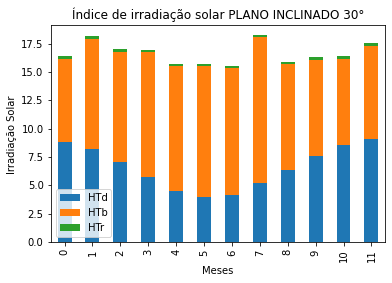

In [71]:
df[["HTd", "HTb", "HTr"]].plot(kind="bar", stacked=True)
plt.title("Índice de irradiação solar PLANO INCLINADO 30°")
plt.xlabel("Meses")
plt.ylabel("Irradiação Solar ")

In [72]:
df1=pd.DataFrame({"Mês":df['Mês'],"Omega_s*":df['omega_s*'],"Rb*":df['Rb'],"R":df['R'],"HT":df['HT'],"HTd":df['HTd'],"HTb":df['HTb'],"HTr":df['HTr']})
df1

,Mês,Omega_s*,Rb*,R,HT,HTd,HTb,HTr
0,1,87.477299,0.788533,0.874334,16.430482,8.786435,7.392282,0.251765
1,2,88.469660,0.890194,0.922706,18.203151,8.216927,9.721919,0.264305
2,3,89.681007,1.039207,1.005134,17.006860,7.056917,9.723258,0.226685
3,4,91.074302,1.255268,1.136746,16.942068,5.692424,11.049968,0.199676
4,5,92.204986,1.478340,1.276283,15.713597,4.538527,11.010121,0.164950
5,6,92.793121,1.616536,1.373579,15.675282,3.993348,11.529042,0.152892
6,7,92.555060,1.558511,1.331111,15.526083,4.189477,11.180338,0.156268
7,8,91.589506,1.350701,1.210561,18.255265,5.171896,12.881336,0.202034
8,9,90.250792,1.120950,1.049501,15.868448,6.368859,9.297019,0.202570
9,10,88.904247,0.940166,0.950154,16.281835,7.621190,8.431067,0.229579
